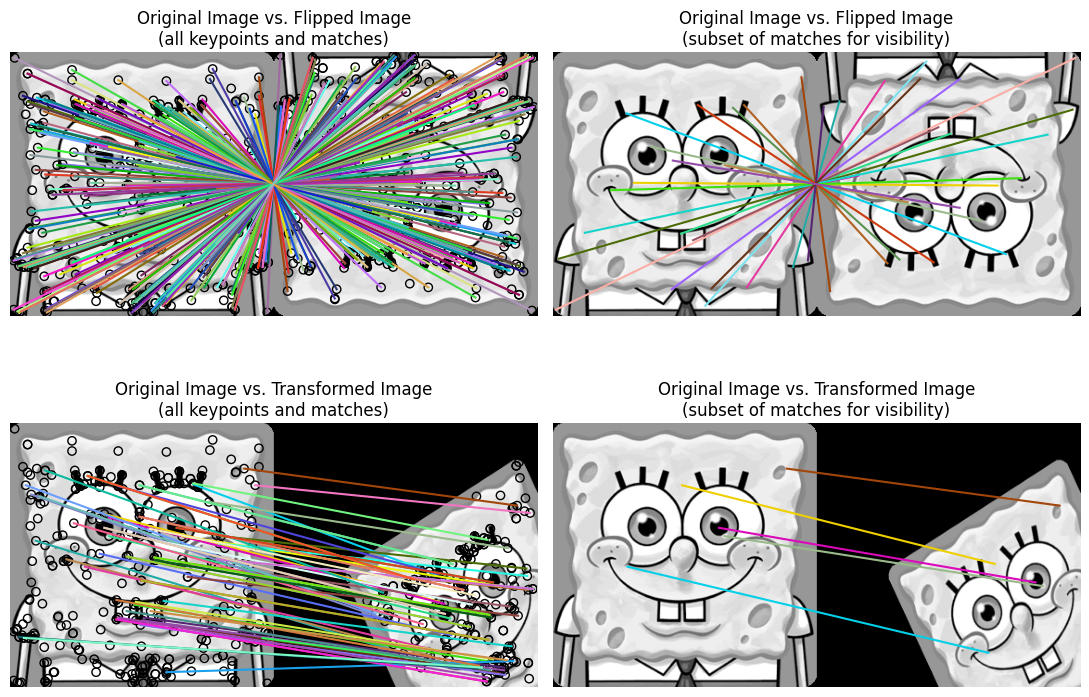

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matched_features, SIFT

from PIL import Image

img1 = rgb2gray(Image.open("image.png").convert("RGB"))
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(
    descriptors1, descriptors2, max_ratio=0.6, cross_check=True
)
matches13 = match_descriptors(
    descriptors1, descriptors3, max_ratio=0.6, cross_check=True
)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

plt.gray()

plot_matched_features(
    img1,
    img2,
    keypoints0=keypoints1,
    keypoints1=keypoints2,
    matches=matches12,
    ax=ax[0, 0],
)
ax[0, 0].axis('off')
ax[0, 0].set_title("Original Image vs. Flipped Image\n" "(all keypoints and matches)")

plot_matched_features(
    img1,
    img3,
    keypoints0=keypoints1,
    keypoints1=keypoints3,
    matches=matches13,
    ax=ax[1, 0],
)
ax[1, 0].axis('off')
ax[1, 0].set_title(
    "Original Image vs. Transformed Image\n" "(all keypoints and matches)"
)

plot_matched_features(
    img1,
    img2,
    keypoints0=keypoints1,
    keypoints1=keypoints2,
    matches=matches12[::15],
    ax=ax[0, 1],
    only_matches=True,
)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    "Original Image vs. Flipped Image\n" "(subset of matches for visibility)"
)

plot_matched_features(
    img1,
    img3,
    keypoints0=keypoints1,
    keypoints1=keypoints3,
    matches=matches13[::15],
    ax=ax[1, 1],
    only_matches=True,
)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    "Original Image vs. Transformed Image\n" "(subset of matches for visibility)"
)

plt.tight_layout()
plt.show()

In [6]:
from PIL import Image
import numpy as np

img = Image.open("image.png")
img_np = np.array(img)

print(type(img_np))    # <class 'numpy.ndarray'>
print(img_np.shape)

<class 'numpy.ndarray'>
(285, 285, 4)


In [ ]:
pip install scikit-image

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/ce/e6/93bebe1abcdce9513ffec01d8af02528b4c41fb3c1e46336d70b9ed4ef0d/scikit_image-0.25.2-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for imageio!=2.35.0,>=2.33 from https://files.pythonhosted.org/packages/cb/bd/b394387b598ed84d8d0fa90611a90bee0adc2021820ad5729f7ced74a8e2/imageio-2.37.0-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/5d/06/bd0a6097da704a7a7c34a94cfd771c3ea3c2f405dd214e790d22c93f6be1/tifffile-2025.5.10-py3-none-any.whl.metadata
  Obtaining dependency information for lazy-loader>=0.4 from https://files.pythonhosted.org/packages/83/60/d497a310bde3f01cb805196ac61b7ad6dc5dcf8dce66634dc34364b20b4f/lazy_loader-0.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 20.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━